In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

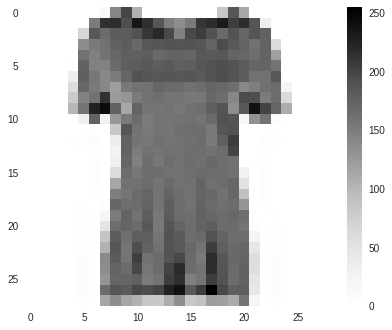

In [17]:
plt.figure
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)